<h1> Capstone Project - Hotel Rating System to Enhance Guest Experience (Week 2)

<h3> Applied Data Science Capstone by IBM/Coursera

<h3> Table of Contents

## Table of Contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## I) INTRODUCTION : BUSINESS PROBLEM <a name="introduction"></a>

The Indian hotel industry is one of most digital advanced industry where a variety of digital tools are used for planning, booking and providing online feedback. The industry consists of international hotel chains, start-ups like Airbnb, Oyo, etc and fragmented small & medium hotels. It is important to understand the factors contributing to a guest (user or customer who stay at the hotel) experience. Efforts taken to enhance the experience will directly lead to higher business revenue, repeat business opportunity, network effect on other travellers and growth of the overall growth of the tourism industry. 

The project aims to understand the factors responsible (for example, hotel brand, location, point of interest, room area, etc) and their relative importance to determine the user rating. Also, comparison will be drawn against the rating provided by the website (Goibibo.com). 

## II) DATA <a name="data"></a>

In [106]:
# Import all library for our analysis
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

import seaborn as sns

from sklearn import preprocessing

<h4> About Dataset

The dataset consists of 3999 hotels which are listed on Indian Hotel Marketplace called Goibibo.com. The hotels are located all across India and present across category. The dataset includes the following columns 

| Field              | Description                                                                           |
|--------------------|---------------------------------------------------------------------------------------|
| additional_info    | Additional facilities provided by the hotel like room service |
| address            | Address of the hotel |
| area               | Which is the area where the hotel is located |
| city               | City where the hotel is located; multiple areas comprise of one city |
| country            | India as the country for all hotels |
| guest_recommendation | Score between 0 to 100 on recommendation to future travellers 
| hotel_brand        | Is the hotel part of a large chain or single establishment |
| hotel_category     | Two categories Gostays or Regular, Gostays are exlcusive platform properties |
| hotel_description  | The check-in and check-out time information |
| hotel_star_rating  | The hotel star rating: 1 to 5 |
| image_count        | The number of property or room images uploaded by the hotel |
| latitude           | The Latitude of the property |
| longitude          | The longitude of the property |
| locality           | The locality of the hotel; it is subset of area which is subset of city |
| page_url           | Direct link to the hotel on platform (website) |
| point_of_interest  | Nearby POI where guests visit and have their photos clicked |
| property_id        | Unique ID of the hotel |
| property_name      | Name of the hotel |
| property_type      | Category of the hotel : Guest House, Resort, Homestay, etc |
| province           | The province of the hotel, a subset of city |
| review_count_by_category | Number of positive, negative and review with images |
| room_area          | Area of the room where the guest stayed in |
| room_count         | The number of rooms in the property |
| room_facilities    | List of facilities provided by the hotel |
| room_type          | Category of the room for which rating is provided by the user |
| site_review_count  | The count of user ratings available on the platform (website) |
| site_review_rating | Average hotel rating provided by the platform (website) |
| site_stay_review_rating | Average guest rating on five parameters: Service Quality, Amenities, Food and Drinks, Value for Money, Location and Cleaniness |
| sitename | Name of the platform or website |
| state    | Location of the property |
| uniq_id  | Unique ID of the property |

In [107]:
df = pd.read_csv('goibibo_com-travel.csv')
df.head(2)

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de


<h4> Data Cleaning

We will perform series of tasks to clean the data 
1. Convert categorical data to numerical data
2. Split the columns : review_count_by_category, room_facilities, site_stay_review_rating
3. Correcting datatype of the dataframe

In [108]:
# Categorical data to numerical data 
from sklearn.preprocessing import LabelEncoder
label_make = LabelEncoder()

df['hotel_brand'] = df['hotel_brand'].astype("str")
df['hotel_brand_label'] = label_make.fit_transform(df['hotel_brand'])
df['hotel_category_label'] = label_make.fit_transform(df['hotel_category'])
df['property_type_label'] = label_make.fit_transform(df['property_type'])
df['room_type_label'] = label_make.fit_transform(df['room_type'])

In [109]:
# Store the labels in new dataframe for future use
hotel_brand_label = df[['hotel_brand_label', 'hotel_brand']]
hotel_brand_label = hotel_brand_label.drop_duplicates()
hotel_brand_label.sort_values(by = 'hotel_brand_label',inplace = True)
hotel_brand_label.reset_index(inplace = True)

hotel_category_label = df[['hotel_category_label', 'hotel_category']]
hotel_category_label = hotel_category_label.drop_duplicates()
hotel_category_label.sort_values(by = 'hotel_category_label',inplace = True)
hotel_category_label.reset_index(inplace = True)

property_label = df[['property_type_label', 'property_type']]
property_label = property_label.drop_duplicates()
property_label.sort_values(by = 'property_type_label' ,inplace = True)
property_label.reset_index(inplace = True)

property_label = df[['room_type_label', 'room_type']]
property_label = property_label.drop_duplicates()
property_label.sort_values(by = 'room_type_label' ,inplace = True)
property_label.reset_index(inplace = True)

__Split the column review_count_by_category__

In [110]:
#Column review_count_by_category is count of the guest reviews in three categories: positive, negative or critical and image review (where images are uploaded)
df_review = df['review_count_by_category'].str.split("|", n=-1, expand = True)
df_review = pd.concat([df_review[0].str.split("::", n=-1, expand = True), df_review[1].str.split("::", n=-1, expand = True), df_review[2].str.split("::", n=-1, expand = True)],axis = 1)
df_review.columns = ["positive","ct_pos_review","critical","ct_crit_review","image","ct_img_review"]
df_review = df_review[['ct_pos_review','ct_crit_review','ct_img_review']]
df_review.head()

#Add the dataframe to master hotel dataframe
df_one = pd.concat([df_review,df], axis = 1)
df_one.head(2)

,ct_pos_review,ct_crit_review,ct_img_review,additional_info,address,area,city,country,crawl_date,guest_recommendation,...,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id,hotel_brand_label,hotel_category_label,property_type_label,room_type_label
0,74,13,13,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983,95,0,14,378
1,8,0,2,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de,95,1,5,403


__Split the column site_stay_review_rating__

In [111]:
#site_stay_review_rating is the guest final rating after the stay for 6 categories - service quality, amenities, food & drinks, value for money, location and cleaniness
df_rating = df['site_stay_review_rating'].str.split("|", n=-1, expand = True)
df_rating.columns = range(df_rating.shape[1])
df_rating = pd.concat([df_rating[0].str.split("::", n=-1, expand = True),df_rating[1].str.split("::", n=-1, expand = True),df_rating[2].str.split("::", n=-1, expand = True), df_rating[3].str.split("::", n=-1, expand = True),df_rating[4].str.split("::", n=-1, expand = True), df_rating[5].str.split("::", n=-1, expand = True)],axis = 1)
df_rating.columns = range(df_rating.shape[1])
df_rating.columns = ["sq","rate_sq","am","rate_am","fd","rate_fd","vm","rate_vm","lo","rate_lo","cl","rate_cl"]
df_rating = df_rating[["rate_sq","rate_am","rate_fd","rate_vm","rate_lo","rate_cl"]]

#Add the dataframe to master hotel dataframe
df_one = pd.concat([df_rating,df_one], axis = 1)
df_one.head(2)

,rate_sq,rate_am,rate_fd,rate_vm,rate_lo,rate_cl,ct_pos_review,ct_crit_review,ct_img_review,additional_info,...,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id,hotel_brand_label,hotel_category_label,property_type_label,room_type_label
0,3.9,3.7,3.8,4.1,4.0,4.1,74,13,13,Room Service|Internet Access|Restaurant|Free I...,...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983,95,0,14,378
1,4.7,4.7,4.3,4.7,4.8,4.8,8,0,2,Room Service|Gym/Spa,...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de,95,1,5,403


__Correct the datatype of key columns__

In [112]:
#Check the datatype of all columns 
df_one.dtypes

rate_sq                      object
rate_am                      object
rate_fd                      object
rate_vm                      object
rate_lo                      object
rate_cl                      object
ct_pos_review                object
ct_crit_review               object
ct_img_review                object
additional_info              object
address                      object
area                         object
city                         object
country                      object
crawl_date                   object
guest_recommendation        float64
hotel_brand                  object
hotel_category               object
hotel_description            object
hotel_facilities             object
hotel_star_rating             int64
image_count                   int64
latitude                    float64
locality                     object
longitude                   float64
pageurl                      object
point_of_interest            object
property_id                 

In [113]:
df_one['rate_sq'] = pd.to_numeric(df_one['rate_sq'], errors='coerce')
df_one['rate_am'] = pd.to_numeric(df_one['rate_am'], errors='coerce')
df_one['rate_fd'] = pd.to_numeric(df_one['rate_fd'], errors='coerce')
df_one['rate_vm'] = pd.to_numeric(df_one['rate_vm'], errors='coerce')
df_one['rate_lo'] = pd.to_numeric(df_one['rate_lo'], errors='coerce')
df_one['rate_cl'] = pd.to_numeric(df_one['rate_cl'], errors='coerce')
df_one['ct_pos_review'] = pd.to_numeric(df_one['ct_pos_review'], errors='coerce')
df_one['ct_crit_review'] = pd.to_numeric(df_one['ct_crit_review'], errors='coerce')
df_one['ct_img_review'] = pd.to_numeric(df_one['ct_img_review'], errors='coerce')

In [114]:
#Create new column for average stay_review_rating 
df_one["rate_guest"] = (df_one.rate_sq + df_one.rate_am + df_one.rate_fd + df_one.rate_vm + df_one.rate_lo + df_one.rate_cl)/6

__Dealing with missing values in dataset__

In [115]:
#Find missing value in the dataset
missing_data = df_one.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())

rate_sq
False    2416
True     1584
Name: rate_sq, dtype: int64
rate_am
False    2416
True     1584
Name: rate_am, dtype: int64
rate_fd
False    2416
True     1584
Name: rate_fd, dtype: int64
rate_vm
False    2416
True     1584
Name: rate_vm, dtype: int64
rate_lo
False    2416
True     1584
Name: rate_lo, dtype: int64
rate_cl
False    2416
True     1584
Name: rate_cl, dtype: int64
ct_pos_review
False    2415
True     1585
Name: ct_pos_review, dtype: int64
ct_crit_review
False    2415
True     1585
Name: ct_crit_review, dtype: int64
ct_img_review
False    2415
True     1585
Name: ct_img_review, dtype: int64
additional_info
False    3192
True      808
Name: additional_info, dtype: int64
address
False    4000
Name: address, dtype: int64
area
False    3965
True       35
Name: area, dtype: int64
city
False    4000
Name: city, dtype: int64
country
False    4000
Name: country, dtype: int64
crawl_date
False    4000
Name: crawl_date, dtype: int64
guest_recommendation
False    2416
True     1584

In [116]:
for column in df_one.columns.values.tolist():
    df_one.replace(np.nan, '0', inplace= True)

__Clean the column room_facilities__

The data has multiple data points which will be useful for our model. For example, guest will be rating hotels (& rooms) higher in case they have Air Conditioning and Cable. We have categorized some of the facilities (keywords) which will drive Guest Experience are 
* Room Service
* Restaurant / Breakfast / Coffee / Tea
* Cable / Satellite / Pay TV
* Internet
* Heating
* Hot Water
* Shower Facility
* Air Conditioning 
* Bathroom
* Telephone
* Newspaper
* Refrigerator
* Housekeeping
* Kitchen
* Extra Bed

These will be refered as 15 hotel facilities variables for future use

In [117]:
df_one['room_facilities'].head()

0    Room Service |Basic Bathroom Amenities|Cable /...
1    Room Service |Air Conditioning |Basic Bathroom...
2    Room Service |Air Conditioning |Cable / Satell...
3    Basic Bathroom Amenities|Cable / Satellite / P...
4    Basic Bathroom Amenities|Cable / Satellite / P...
Name: room_facilities, dtype: object

In [118]:
# Search for room service in column ROOM_FACILITIES and create room_service (true = 1 and false = 0) as new column
room_service = ['Room Service']
for room in room_service:
    df_one['room_service'] = df_one['room_facilities'].str.contains(room)
df_one['room_service'].replace(np.nan,'0',inplace=True)
df_one['room_service'] = df_one['room_service'].astype(int)
df_one['room_service'].value_counts()

1    2721
0    1279
Name: room_service, dtype: int64

In [119]:
# Search for restaurant in column ROOM_FACILITIES and create restaurant (true = 1 and false = 0) as new column
rest = ['Restaurant','Breakfast Available','Coffee','Tea']
for x in rest:
    df_one['restaurant'] = df_one['room_facilities'].str.contains(x)

df_one['restaurant'].replace(np.nan,'0',inplace=True)
df_one['restaurant'] = df_one['restaurant'].astype(int)
df_one['restaurant'].value_counts()

0    3337
1     663
Name: restaurant, dtype: int64

In [120]:
# Search for cable, tv, etc in column ROOM_FACILITIES and create cable (true = 1 and false = 0) as new column
cable = ['Cable','TV','Pay TV','Satellite']
for x in cable:
    df_one['cable'] = df_one['room_facilities'].str.contains(x)

df_one['cable'].replace(np.nan,'0',inplace=True)
df_one['cable'] = df_one['cable'].astype(int)
df_one['cable'].value_counts()

1    2155
0    1845
Name: cable, dtype: int64

In [121]:
# Search for internet in column ROOM_FACILITIES and create internet (true = 1 and false = 0) as new column
internet = ['Internet']
for x in internet:
    df_one['internet'] = df_one['room_facilities'].str.contains(x)

df_one['internet'].replace(np.nan,'0',inplace=True)
df_one['internet'] = df_one['internet'].astype(int)
df_one['internet'].value_counts()

0    3214
1     786
Name: internet, dtype: int64

In [122]:
# Search for heating in column ROOM_FACILITIES and create heating (true = 1 and false = 0) as new column
heat = ['Heating']
for x in heat:
    df_one['heating'] = df_one['room_facilities'].str.contains(x)

df_one['heating'].replace(np.nan,'0',inplace=True)
df_one['heating'] = df_one['heating'].astype(int)
df_one['heating'].value_counts()

0    3787
1     213
Name: heating, dtype: int64

In [123]:
# Search for hot water in column ROOM_FACILITIES and create hot_water (true = 1 and false = 0) as new column
water = ['Hot Water','Water', 'Hot',]
for x in water:
    df_one['hot_water'] = df_one['room_facilities'].str.contains(x)

df_one['hot_water'].replace(np.nan,'0',inplace=True)
df_one['hot_water'] = df_one['hot_water'].astype(int)
df_one['hot_water'].value_counts()

1    2034
0    1966
Name: hot_water, dtype: int64

In [124]:
# Search for shower facility in column ROOM_FACILITIES and create shower (true = 1 and false = 0) as new column
shower = ['Shower']
for x in shower:
    df_one['shower'] = df_one['room_facilities'].str.contains(x)

df_one['shower'].replace(np.nan,'0',inplace=True)
df_one['shower'] = df_one['shower'].astype(int)
df_one['shower'].value_counts()

0    3285
1     715
Name: shower, dtype: int64

In [125]:
# Search for bathroom facility in column ROOM_FACILITIES and create bathroom (true = 1 and false = 0) as new column
bath = ['Bathroom']
for x in bath:
    df_one['bathroom'] = df_one['room_facilities'].str.contains(x)

df_one['bathroom'].replace(np.nan,'0',inplace=True)
df_one['bathroom'] = df_one['bathroom'].astype(int)
df_one['bathroom'].value_counts()

1    3200
0     800
Name: bathroom, dtype: int64

In [126]:
# Search for air conditioning facility in column ROOM_FACILITIES and create air_cond (true = 1 and false = 0) as new column
ac = ['AC', 'Air Conditioning','A.C.']
for x in ac:
    df_one['air_cond'] = df_one['room_facilities'].str.contains(x)

df_one['air_cond'].replace(np.nan,'0',inplace=True)
df_one['air_cond'] = df_one['air_cond'].astype(int)
df_one['air_cond'].value_counts()

0    3728
1     272
Name: air_cond, dtype: int64

In [127]:
# Search for newpaper facility in column ROOM_FACILITIES and create newspaper (true = 1 and false = 0) as new column
news = ['Newspaper','paper']
for x in news:
    df_one['newspaper'] = df_one['room_facilities'].str.contains(x)

df_one['newspaper'].replace(np.nan,'0',inplace=True)
df_one['newspaper'] = df_one['newspaper'].astype(int)
df_one['newspaper'].value_counts()

0    3039
1     961
Name: newspaper, dtype: int64

In [128]:
# Search for telephone facility in column ROOM_FACILITIES and create telephone (true = 1 and false = 0) as new column
tele = ['Telephone']
for x in tele:
    df_one['telephone'] = df_one['room_facilities'].str.contains(x)

df_one['telephone'].replace(np.nan,'0',inplace=True)
df_one['telephone'] = df_one['telephone'].astype(int)
df_one['telephone'].value_counts()

0    2333
1    1667
Name: telephone, dtype: int64

In [129]:
# Search for Refrigerator facility in column ROOM_FACILITIES and create refrigerator (true = 1 and false = 0) as new column
ref = ['Refrigerator']
for x in ref:
    df_one['refrigerator'] = df_one['room_facilities'].str.contains(x)

df_one['refrigerator'].replace(np.nan,'0',inplace=True)
df_one['refrigerator'] = df_one['refrigerator'].astype(int)
df_one['refrigerator'].value_counts()

0    3534
1     466
Name: refrigerator, dtype: int64

In [130]:
# Search for Housekeeping facility in column ROOM_FACILITIES and create housekeeping (true = 1 and false = 0) as new column
house = ['Housekeeping']
for x in house:
    df_one['housekeeping'] = df_one['room_facilities'].str.contains(x)

df_one['housekeeping'].replace(np.nan,'0',inplace=True)
df_one['housekeeping'] = df_one['housekeeping'].astype(int)
df_one['housekeeping'].value_counts()

0    2089
1    1911
Name: housekeeping, dtype: int64

In [131]:
# Search for Kitchen facility in column ROOM_FACILITIES and create kitchen (true = 1 and false = 0) as new column
kit = ['Kitchen']
for x in kit:
    df_one['kitchen'] = df_one['room_facilities'].str.contains(x)

df_one['kitchen'].replace(np.nan,'0',inplace=True)
df_one['kitchen'] = df_one['kitchen'].astype(int)
df_one['kitchen'].value_counts()

0    3860
1     140
Name: kitchen, dtype: int64

In [132]:
# Search for extra bed facility in column ROOM_FACILITIES and create extra_bed (true = 1 and false = 0) as new column
bed = ['Extra Bed','Bed']
for x in bed:
    df_one['extra_bed'] = df_one['room_facilities'].str.contains(x)

df_one['extra_bed'].replace(np.nan,'0',inplace=True)
df_one['extra_bed'] = df_one['extra_bed'].astype(int)
df_one['extra_bed'].value_counts()

0    2932
1    1068
Name: extra_bed, dtype: int64

In [133]:
df_one.head(2)

,rate_sq,rate_am,rate_fd,rate_vm,rate_lo,rate_cl,ct_pos_review,ct_crit_review,ct_img_review,additional_info,...,hot_water,shower,bathroom,air_cond,newspaper,telephone,refrigerator,housekeeping,kitchen,extra_bed
0,3.9,3.7,3.8,4.1,4,4.1,74,13,13,Room Service|Internet Access|Restaurant|Free I...,...,1,1,1,0,0,1,0,1,0,1
1,4.7,4.7,4.3,4.7,4.8,4.8,8,0,2,Room Service|Gym/Spa,...,1,0,1,0,1,1,1,1,0,1


## III) METHODOLOGY <a name="methodology"></a>

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

__Select the Feature Set__

The following 26 variables will be part of feature set to predict the target variable 

| SNo | Field              | Description                                                                           |
|-|-------------------|---------------------------------------------------------------------------------------|
|1| guest_recommendation | Score between 0 to 100 on recommendation to future travellers 
|2| hotel_brand_label        | Is the hotel part of a large chain or single establishment |
|3| hotel_category_label     | Two categories Gostays or Regular, Gostays are exlcusive platform properties |
|4| hotel_star_rating  | The hotel star rating: 1 to 5 |
|5| image_count        | The number of property or room images uploaded by the hotel |
|6| property_type_label      | Category of the hotel : Guest House, Resort, Homestay, etc |
|7| ct_pos_review      | Count of number of positive, negative and review with images |
|8| ct_crit_review     | Count of number of positive, negative and review with images |
|9| ct_img_review      | Count of number of positive, negative and review with images |
|10| room_count         | The number of rooms in the property |
|11| room_type_label    | Category of the room for which rating is provided by the user |
|12| room_service       | Captured from hotel_facilities column |
|13| restaurant         | Captured from hotel_facilities column |
|14| cable              | Captured from hotel_facilities column |
|15| internet           | Captured from hotel_facilities column |
|16| heating            | Captured from hotel_facilities column |
|17| hot_water          | Captured from hotel_facilities column |
|18| shower             | Captured from hotel_facilities column |
|19| air_cond           | Captured from hotel_facilities column |
|20| bathroom           | Captured from hotel_facilities column |
|21| telephone          | Captured from hotel_facilities column |
|22| newspaper          | Captured from hotel_facilities column |
|23| refrigerator       | Captured from hotel_facilities column |
|24| housekeeping       | Captured from hotel_facilities column |
|25| kitchen            | Captured from hotel_facilities column |
|26| extra_bed          | Captured from hotel_facilities column |

In [134]:
df_one.columns

Index(['rate_sq', 'rate_am', 'rate_fd', 'rate_vm', 'rate_lo', 'rate_cl',
       'ct_pos_review', 'ct_crit_review', 'ct_img_review', 'additional_info',
       'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id',
       'hotel_brand_label', 'hotel_category_label', 'property_type_label',
       'room_type_label', 'rate_guest', 'room_service', 'restaurant', 'cable',
       'internet', 'heating', 'hot_water', 'shower', 'bathroom', 'air_cond',
      

In [135]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
feature = df_one[['ct_pos_review', 'ct_crit_review', 'ct_img_review', 'guest_recommendation', 'hotel_star_rating','image_count', 'room_count', 'hotel_brand_label', 'hotel_category_label', 'property_type_label','room_type_label', 'room_service', 'restaurant', 'cable','internet', 'heating', 'hot_water', 'shower', 'air_cond', 'bathroom','telephone', 'newspaper', 'refrigerator', 'housekeeping', 'kitchen','extra_bed']].values.astype('int')
feature[0:2]

array([[ 74,  13,  13,  85,   2,  20,  17,  95,   0,  14, 378,   1,   0,
          1,   1,   1,   1,   1,   0,   1,   1,   0,   0,   1,   0,   1],
       [  8,   0,   2,  87,   0,  17,  18,  95,   1,   5, 403,   1,   1,
          1,   1,   0,   1,   0,   0,   1,   1,   1,   1,   1,   0,   1]])

__Select the Target Set__

The target set here is understand the guest rating which is a combination of 6 factors
* Service Quality
* Amenities
* Food and Drinks
* Value for Money
* Location
* Cleanliness

We have created a mean rating called as rate_guest in our dataframe which we will use as target set for our analysis

In [136]:
y = df_one['rate_guest'].values.astype('int')
y[0:2]

array([3, 4])

__Exploratory Data Analysis__

We will carry out a series of analysis to understand the dataset and summarize the main characterstics using graphs
Following analysis are captured in this notebook
* Pearson correlation matrix between feature and target set
* Scatter plot between feature set (29 variables) and target variable 

In [137]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print(plt.style.available)
plt.style.use('seaborn-white')

Matplotlib version:  3.1.3
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


Text(0, 0.5, 'Pearson Coorelation')

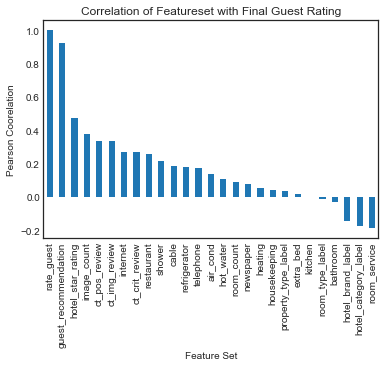

In [138]:
df_corr = df_one[['ct_pos_review', 'ct_crit_review', 'ct_img_review', 'guest_recommendation', 'hotel_star_rating','image_count','room_count', 'hotel_brand_label', 'hotel_category_label', 'property_type_label','room_type_label', 'room_service', 'restaurant', 'cable','internet', 'heating', 'hot_water', 'shower', 'air_cond', 'bathroom','telephone', 'newspaper', 'refrigerator', 'housekeeping', 'kitchen','extra_bed','rate_guest']]
df_corr = df_corr.astype(float)
corr_data = df_corr.corr(method ='pearson')
corr_data['rate_guest'].sort_values(ascending= False).plot(kind='bar')
plt.title ("Correlation of Featureset with Final Guest Rating")
plt.xlabel ("Feature Set")
plt.ylabel ("Pearson Coorelation")

Scatter Plot between Guest Rating and Count of Reviews

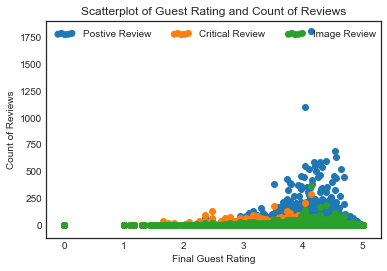

In [139]:
a = df_one['rate_guest']
b = df_one['ct_pos_review']
c = df_one['ct_crit_review']
d = df_one['ct_img_review']
ab = plt.scatter(a,b)
ac = plt.scatter(a,c)
ad = plt.scatter(a,d)
plt.title ("Scatterplot of Guest Rating and Count of Reviews")
plt.xlabel ("Final Guest Rating")
plt.ylabel ("Count of Reviews")

plt.legend((ab,ac,ad),
           ('Postive Review', 'Critical Review', 'Image Review'),
           scatterpoints=5,
           loc='upper left',
           ncol=5,
           fontsize=10)

<function print>

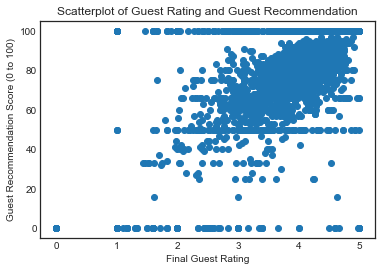

In [140]:
a = df_one['rate_guest']
b = df_one['guest_recommendation']
ab = plt.scatter(a,b)
plt.title ("Scatterplot of Guest Rating and Guest Recommendation")
plt.xlabel ("Final Guest Rating")
plt.ylabel ("Guest Recommendation Score (0 to 100)")
print 

Text(0, 0.5, 'Hotel Star Rating')

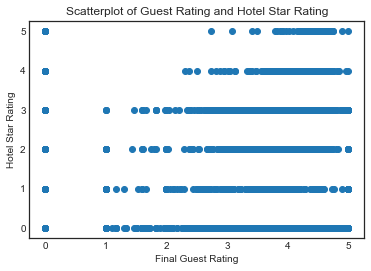

In [141]:
a = df_one['rate_guest']
b = df_one['hotel_star_rating']
ab = plt.scatter(a,b)
plt.title ("Scatterplot of Guest Rating and Hotel Star Rating")
plt.xlabel ("Final Guest Rating")
plt.ylabel ("Hotel Star Rating")

## IV) ANALYSIS <a name="analysis"></a>

__Data Normalization__

In [142]:
X = preprocessing.StandardScaler().fit(feature).transform(feature)
X[0:1]

array([[ 0.752087  ,  0.67603522,  0.69298357,  0.96184749,  0.46924423,
         0.60229622, -0.05410158,  0.2608217 , -5.47793318,  1.57681537,
        -0.74384496,  0.6856003 , -0.44573697,  0.92528293,  2.02214206,
         4.21655579,  0.98314207,  2.14345646, -0.27011363,  0.5       ,
         1.18301314, -0.56233659, -0.36312796,  1.04553572, -0.19044535,
         1.65690022]])

__Classification Models__

We will use classification models here to determine the target variable
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

__Model 1 - K Nearest Neighbor__

In [143]:
from sklearn.neighbors import KNeighborsClassifier            #for running KNN cluster
from sklearn.model_selection import train_test_split          #for splitting the dataset
from sklearn import metrics                                   #for calculating model accuracy 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#We will split the data into train and test data 
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2800, 26) (1200, 26) (2800,) (1200,)


In [144]:
#Now we will train the model using KNN library; we will start with k=5 which is rating scale for us from 1 to 5
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [145]:
#We will predict the values of y based on model
yhat = neigh.predict(x_test)

#Get the model accuracy on test data
j_score = jaccard_score(y_test,yhat, average ='weighted')
print("The Jaccard Similarity Score is",j_score)

f_score = f1_score(y_test,yhat,average='weighted')
print("The F1 Score is",f_score)

score_1 = [[j_score,f_score]]  #storing the data for comparison of models

The Jaccard Similarity Score is 0.49816928278394373
The F1 Score is 0.6182800570534339


The best accuracy was with 0.5214542770521599 with k= 17


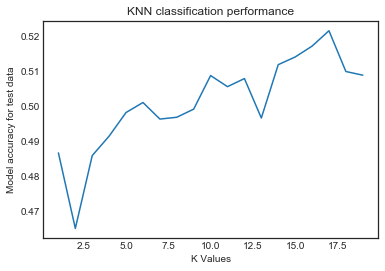

In [146]:
#Next we will determine the model accuracy for values of k from 1 to 10

#The for loop will train the model for values of k and store the model accuracy in array
ks=20
mean_acc = np.zeros((ks-1))

for n in range (1, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    mean_acc[n-1] = jaccard_score(y_test,neigh.predict(x_test),average='weighted')


# We wil plot the model accuracy and k value to get the best value of k    
plt.plot(range(1,ks),mean_acc)
plt.xlabel("K Values")
plt.ylabel("Model accuracy for test data")
plt.title("KNN classification performance")

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

From KNN model we understand that K = 5 is the best classifier as there is a sharp change in model accuracy at K = 5. We can also evaluate a model where K = 15 at which the model accuracy is highest. However, this needs to be evaluated after understanding other classification models. 

__Model 2 - Decision Tree__

In [147]:
#Create instance of Decision Tree classfier
from sklearn.tree import DecisionTreeClassifier
hotel_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#We will use the same train and test data to create decision tree here 
hotel_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
#Predict the values of target on the testing data
yhat = hotel_tree.predict(x_test)

#Get the model accuracy on test data
j_score = metrics.jaccard_score(y_test,yhat,average ='weighted')
print("The Jaccard Similarity Score is",j_score)

f_score = f1_score(y_test,yhat,average='weighted')
print("The F1 Score is",f_score)

score_2 = [[j_score,f_score]]  #storing the data for comparison of models

The Jaccard Similarity Score is 0.6749604787714544
The F1 Score is 0.7592296267074394


__Model 3 - Logistics Regression__

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
# Predict the guest rating and probability 
yhat = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)

#Evaluation of model 

j_score = jaccard_score(y_test,yhat,average='weighted')
f_score = f1_score(y_test,yhat,average='weighted')
log_score = log_loss(y_test,yhat_prob)

print("The Jaccard Similarity Score is",j_score)
print("The F1 Score is",f_score)
print("The Log Loss is",log_score)

score_4 = [[j_score,f_score,log_score]]  #storing the data for comparison of models

The Jaccard Similarity Score is 0.5775776060060425
The F1 Score is 0.6854473316590419
The Log Loss is 0.9263113923200827


__Model 4 - Supoort Vector Machine__

In [151]:
from sklearn import svm             #Import the SVM function
clf = svm.SVC(kernel='rbf')         #We will model with RBF kernel here 
clf.fit(x_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [152]:
#Predict the guest rating
yhat = clf.predict(x_test)

#Get the model accuracy on test data

j_score = jaccard_score(y_test,yhat, average='weighted')
f_score = f1_score(y_test,yhat,average='weighted')

print("The Jaccard Similarity Score is",j_score)
print("The F1 Score is",f_score)

score_3 = [[j_score,f_score]]  #storing the data for comparison of models

The Jaccard Similarity Score is 0.6331948608334366
The F1 Score is 0.729418492966733


__Comparison of Models__

In [153]:
#Comparing the models

score = score_1 + score_2 + score_3 + score_4
score_df = pd.DataFrame(score, columns = ['Jaccard','F Score','Log Loss'])
score_df.index = ['KNN','Decision Tree','SVM','Logistic Regression']
score_df

,Jaccard,F Score,Log Loss
KNN,0.498169,0.618280,NaN
Decision Tree,0.674960,0.759230,NaN
SVM,0.633195,0.729418,NaN
Logistic Regression,0.577578,0.685447,0.926311


## V) RESULTS AND DISCUSSION <a name="results"></a>

The decision tree classfication model provides the best accuracy score. Lets visualize the decision tree 

In [154]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
%matplotlib inline 

In [155]:
feature = df_one[['ct_pos_review', 'ct_crit_review', 'ct_img_review', 'guest_recommendation', 'hotel_star_rating','image_count','room_count', 'hotel_brand_label', 'hotel_category_label', 'property_type_label','room_type_label', 'room_service', 'restaurant', 'cable','internet', 'heating', 'hot_water', 'shower', 'air_cond', 'bathroom','telephone', 'newspaper', 'refrigerator', 'housekeeping', 'kitchen','extra_bed']]
featureNames = feature.columns
featureNames

Index(['ct_pos_review', 'ct_crit_review', 'ct_img_review',
       'guest_recommendation', 'hotel_star_rating', 'image_count',
       'room_count', 'hotel_brand_label', 'hotel_category_label',
       'property_type_label', 'room_type_label', 'room_service', 'restaurant',
       'cable', 'internet', 'heating', 'hot_water', 'shower', 'air_cond',
       'bathroom', 'telephone', 'newspaper', 'refrigerator', 'housekeeping',
       'kitchen', 'extra_bed'],
      dtype='object')

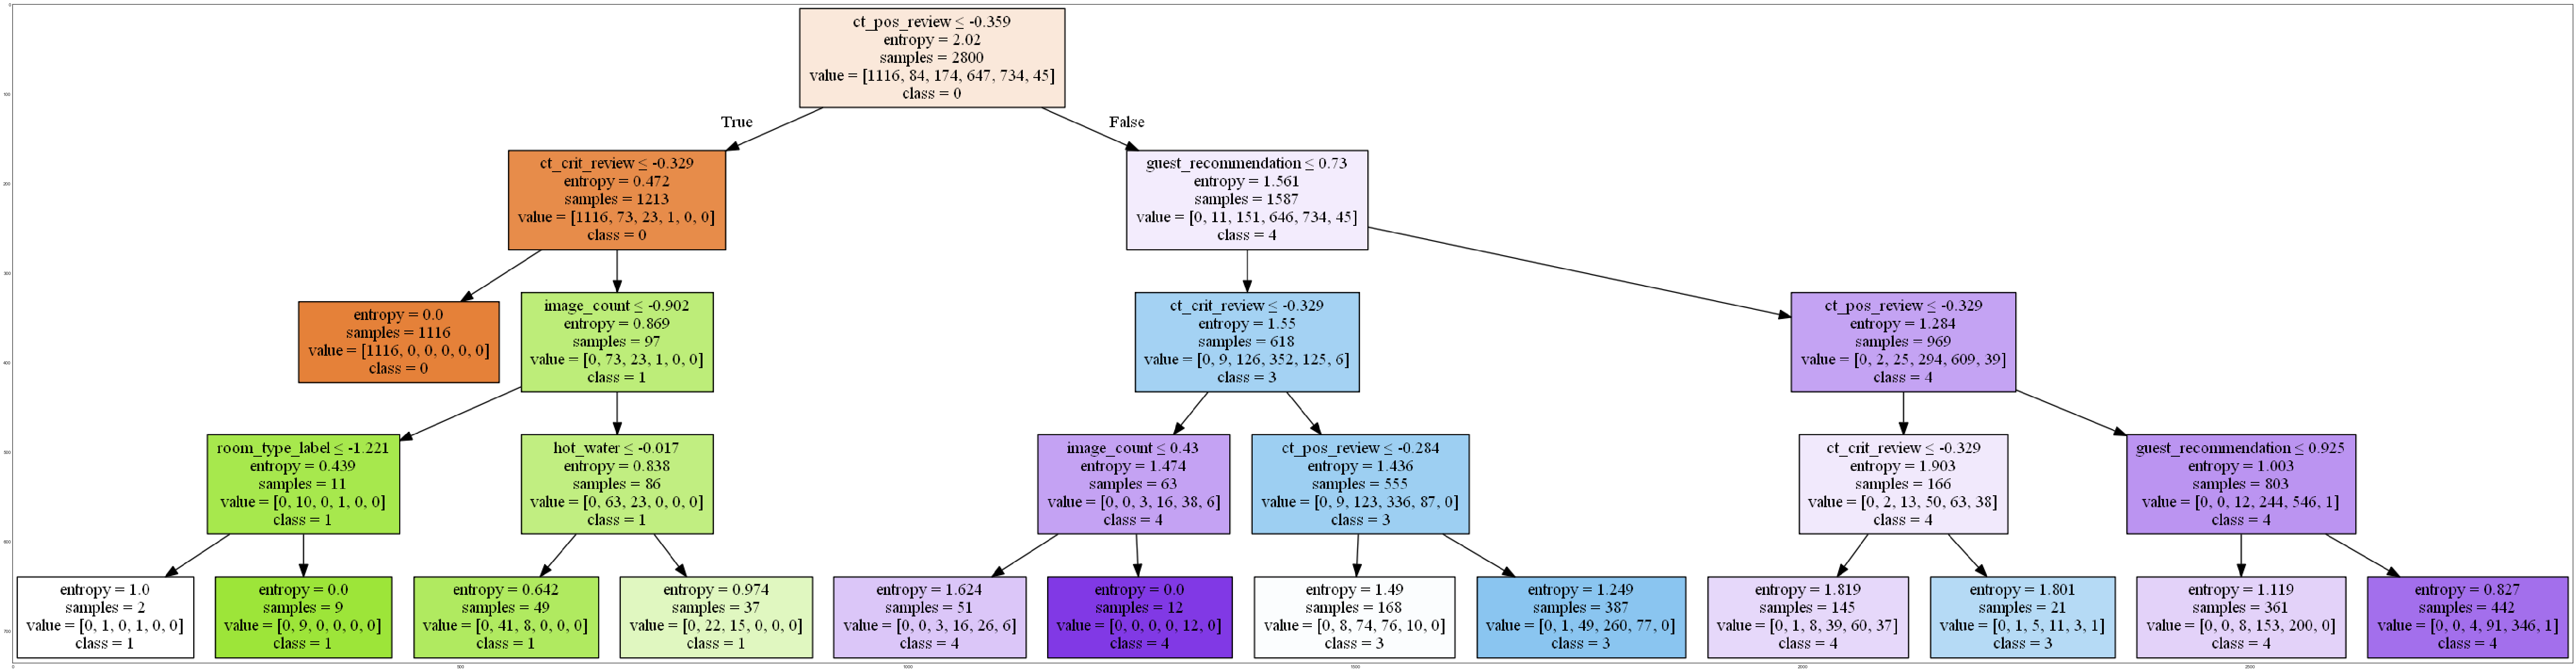

In [156]:
dot_data = StringIO()
filename = "hoteltree_one.png"
out=tree.export_graphviz(hotel_tree,feature_names=featureNames, out_file=dot_data, class_names= ['0','1','2','3','4','5'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

Other than site_review_count which is the number of reviews written about the hotel on the website, following variables are important
* ct_pos_review – count of positive reviews on the website 
* image_count – count of image reviews on the website 
* guest_recommendation – a score from 0 to 100 provided by the guest for future travellers 
* room_type_label – the category of room the guest stayed (deluxe, villa, homestay, etc)
* hot_water – whether the room had hot water in the facilities 
* ct_crit_review – count of critical reviews on the website 

In [157]:
df_one['room_type'].value_counts()[0:10]

Deluxe Room          683
Standard Room        366
Deluxe                98
Executive Room        90
Super Deluxe Room     81
Standard              44
Superior Room         44
AC Room               38
Suite Room            36
STANDARD ROOM         35
Name: room_type, dtype: int64

We created second **decision tree model** using the dataset created from room_facilities only. This is important to test, which facilities are important to the guest experience. 

In [158]:
feature_two = df_one[['room_service', 'restaurant', 'cable','internet', 'heating', 'hot_water', 'shower', 'air_cond', 'bathroom','telephone', 'newspaper', 'refrigerator', 'housekeeping', 'kitchen','extra_bed']].values.astype('int')
feature_two[0:2]

X = preprocessing.StandardScaler().fit(feature_two).transform(feature_two)
X[0:1]

y = df_one['rate_guest'].values.astype('int')
y[0:2]

#We will split the data into train and test data 
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2800, 15) (1200, 15) (2800,) (1200,)


In [159]:
#Create instance of Decision Tree classfier
from sklearn.tree import DecisionTreeClassifier
hotel_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#We will use the same train and test data to create decision tree here 
hotel_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [160]:
#Predict the values of target on the testing data
yhat = hotel_tree.predict(x_test)

#Get the model accuracy on test data
j_score = metrics.jaccard_score(y_test,yhat,average ='weighted')
print("The Jaccard Similarity Score is",j_score)

f_score = f1_score(y_test,yhat,average='weighted')
print("The F1 Score is",f_score)

score_2 = [[j_score,f_score]]  #storing the data for comparison of models

The Jaccard Similarity Score is 0.2928104718414612
The F1 Score is 0.4204436180870134


In [161]:
feature_two = df_one[['room_service', 'restaurant', 'cable','internet', 'heating', 'hot_water', 'shower', 'air_cond', 'bathroom','telephone', 'newspaper', 'refrigerator', 'housekeeping', 'kitchen','extra_bed']]
featureNames = feature_two.columns
featureNames

Index(['room_service', 'restaurant', 'cable', 'internet', 'heating',
       'hot_water', 'shower', 'air_cond', 'bathroom', 'telephone', 'newspaper',
       'refrigerator', 'housekeeping', 'kitchen', 'extra_bed'],
      dtype='object')

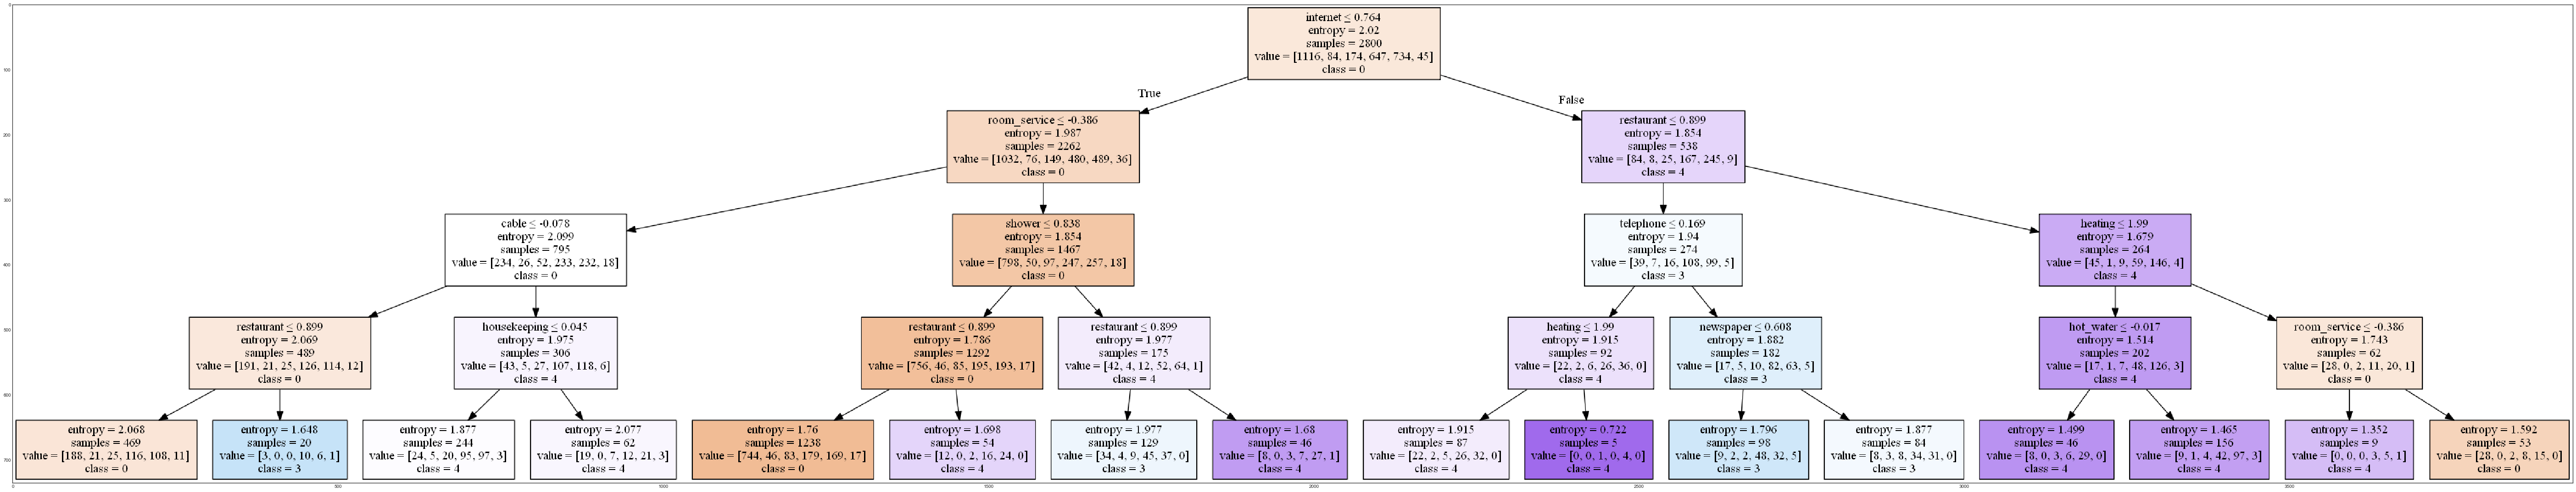

In [162]:
dot_data = StringIO()
filename = "hoteltree_two.png"
out=tree.export_graphviz(hotel_tree,feature_names=featureNames, out_file=dot_data, class_names= ['0','1','2','3','4','5'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

Though the model accuracy is low at 30%, the key facilities which are important for guest experience are 
* Internet 
* Restaurant 
* Room service 
* Cable 
* Shower 
* Heating 
* Telephone 
* Newspaper
* Hot water

Following are not important
* Air conditioning 
* Bathroom
* Refrigerator 
* Housekeeping 
* Kitchen 
* Extra bed

## VI) CONCLUSION <a name="conclusion"></a>

In this study, a predictive classification model was created using Decision Trees to understand the drivers of guest experience of staying at hotels. The study was primarily aimed for hotel owners and Goibibo website to undertake steps to ensure that guest has a happy stay at their hotels. 

We understood that count of reviews (positive, critical and image), count of images, room type and room facilities are primary drivers of enhancing the guest experience at the hotel. A high accuracy (~90%) is observed from the decision tree model.

For further study, I would recommend looking at factors like point of interest, weather or climatic conditions in the city, duration of the stay and large set of room facilities to understand the guest experience. 